# Topic Modeling with LDA
Author Name - Yelp Data, 
ASU ID - 1229148936, 
File Creation Date - Feb 1, 2024

In [1]:
!pip install gensim==4.3.2
!pip install pyLDAvis==3.4.1
!pip install spacy==3.6.1
#!pip install --upgrade numpy==1.24.4
!pip install --upgrade numpy==1.24.3

In [2]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

In [3]:
import spacy.cli;
spacy.cli.download("en_core_web_lg");

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.4 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
import pandas as pd
data = pd.read_csv('/Users/vijaykumardevalla/Documents/Unstructured Data Analytics/Assignment 3/restaurant_reviews_az.csv')

In [5]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny        48147 non-null  int64 
 6   cool         48147 non-null  int64 
 7   text         48147 non-null  object
 8   date         48147 non-null  object
 9   Sentiment    48147 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 3.7+ MB


In [6]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import spacy

# Load the English language model (you might need to download it first with spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")


#TF-IDF without Data Processing

In [11]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in data.iterrows():
    text = row["text"]
    documents.append(nlp(text))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [12]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(1, 0.05104439536336935), (4, 0.04233917491747579), (6, 0.006917237548204947), (20, 0.02754985525741173), (22, 0.058321897429922206), (35, 0.013061145676662885), (40, 0.02403767691378531), (60, 0.0644587086469477), (69, 0.05935619166746436), (70, 0.041064944334284856), (75, 0.024997485412037838), (76, 0.023006533424721632), (102, 0.13069982362227708), (106, 0.01799985232141776), (110, 0.04105720046810101), (119, 0.04342361530450479), (166, 0.03530644011838287), (169, 0.03201901728151298), (171, 0.08874344128378939), (172, 0.2095878135005082), (173, 0.22073198127441415), (174, 0.2126387661741898), (175, 0.16347833989751498), (176, 0.16949490262367417), (177, 0.17227413793915256), (178, 0.15801889327490537), (179, 0.12953945401950043), (180, 0.30997605786589727), (181, 0.10823673177327091), (182, 0.19081272762694357), (183, 0.11216849533889632), (184, 0.1965922441569523), (185, 0.14446244549548085), (186, 0.07563655440977678), (187, 0.167158399610104), (188, 0.2535514430397488), (189, 0

In [13]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in data.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [14]:
print(corpus_tfidf[2])

[(1, 0.06432163341549128), (35, 0.09467425692769393), (93, 0.1906880782147724), (94, 0.184707641835784), (95, 0.1640370968769277), (96, 0.1388295185310493), (97, 0.2962858332346956), (98, 0.21946769967510463), (99, 0.11052819882867163), (100, 0.2539004303060642), (101, 0.22771459322555168), (102, 0.17846495136142226), (103, 0.12331967817740434), (104, 0.2954878461482439), (105, 0.2949623163533192), (106, 0.2952244434693993), (107, 0.3412634103917746), (108, 0.05958512469535246), (109, 0.09531912688557592), (110, 0.1445910794068106), (111, 0.22385439097606621), (112, 0.11138394436277957), (113, 0.13521202950878788), (114, 0.14129613572741617), (115, 0.21553043543075215)]


In [15]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

In [16]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.009*"bang" + 0.007*"Cheesecake" + 0.007*"lemonade" + 0.006*"hawaiian" + 0.005*"mad"')
(1, '0.005*"baklava" + 0.005*"DoorDash" + 0.005*"pork" + 0.004*"BBQ" + 0.004*"chicken"')
(2, '0.008*"masala" + 0.008*"deliciousness" + 0.007*"indian" + 0.007*"Nate" + 0.006*"jalapeños"')
(3, '0.011*"korean" + 0.010*"courtyard" + 0.009*"smoothie" + 0.008*"Worth" + 0.008*"craft"')
(4, '0.008*"Popeyes" + 0.007*"Buzz" + 0.006*"Meatball" + 0.005*"nigiri" + 0.005*"Monica"')
(5, '0.008*"," + 0.006*"t" + 0.006*"order" + 0.005*"food" + 0.005*"s"')
(6, '0.007*"calamari" + 0.007*"chic" + 0.007*"Beef" + 0.006*"Sushi" + 0.006*"Cold"')
(7, '0.008*"great" + 0.008*"," + 0.006*"good" + 0.006*"amazing" + 0.006*"love"')
[(0, 0.4424446642529803), (1, 0.043552578854301395), (2, 0.1602741717961224), (3, 0.0609840957609051), (4, 0.04858670768032492), (5, 0.05342330160889773), (6, 0.05773514111542621), (7, 0.052352441580004946), (8, 0.5614953023065414), (9, 0.1385978314732062), (10, 0.10539988674537239), (11, 0.140125

In [17]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

In [58]:
#Interpretation

I think topics 1 and 2 are about restaurants because it has words like food, place, table, service, staff, pizza, eat etc which are used to describe a restaurant and it's services. Topic 3 is about different cuisines and the food available in those cuisines. It also explains what ingredients are used in those cuisines. It has words like chicken, beef, ramen, sauce, alfredo and tasteless which tells us about the dishes.Topics 7,4 could be related to food or dining experiences, as many of the terms are food items or related to food (e.g., "broil," "burrata"). There are also terms that might relate to a cultural or social context (like "Vietnamese," "Patio," "Christmas"), indicating that the topic could encompass social gatherings or cultural cuisines. Coming to Topic 5, the presence of food items suggests that this topic might have something to do with dining or cuisine. The mix of other terms like "chic," "spa," and "corporate" could imply a setting or context, possibly referring to upscale dining experiences or corporate dining settings. Terms like "anniversary" and "complement" might indicate special occasions or service-related aspects associated with the dining experience. Topic 6 and Topic 8 include specific food items or types of cuisine (Indian for Topic 8 and Korean for Topic 6). They both contain terms that could relate to the experience or context of dining (e.g., "saucy," "diverse," "condition" for Topic 8 and "craft," "outdoors," "bottomless" for Topic 6).

In [18]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.5397433251094326


In [19]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/var/folders/cd/xth5td056xg6_t8pxj8ngh980000gn/T/ipykernel_31799/2035622219.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


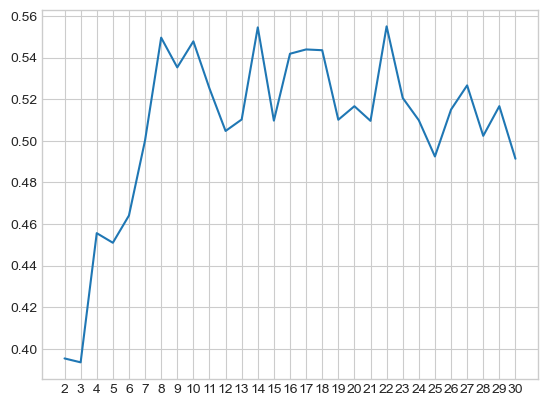

In [20]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

After reviewing the coherence measure plot, I've decided to select k=22 for the number of topics in my LDA model. This point on the graph represents a peak in coherence, suggesting that the topics identified are both meaningful and well-separated. Choosing
K=22 balances the depth and breadth of topics against the complexity of the model, ensuring interpretability while also maintaining computational efficiency. It's a strategic choice that optimizes the quality of the topics without overcomplicating the model.

In [22]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=22)


In [24]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assume you have already fitted your LDA model as `lda_model`

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)

# Display the visualization in a Jupyter notebook
pyLDAvis.display(vis_data)



In [25]:
#1-star reviews

In [30]:
onestar_df = data[(data['stars']==1)]

In [31]:
onestar_df.shape

(8466, 10)

In [32]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in onestar_df.iterrows():
    text = row["text"]
    documents.append(nlp(text))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [33]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(19, 0.011341854568527978), (27, 0.21314251904229364), (39, 0.05049615326761402), (111, 0.17437884438979065), (116, 0.12472543496187478), (118, 0.22397564754726784), (119, 0.27083980074670616), (120, 0.16033041956136374), (121, 0.3177446829906422), (122, 0.21266716106112718), (123, 0.2537668833105471), (124, 0.038349860799821694), (125, 0.26139804401300903), (126, 0.11641147243165537), (127, 0.09192234464871203), (128, 0.12006959781719728), (129, 0.04096264607632099), (130, 0.08639634045504994), (131, 0.10833711849583053), (132, 0.22585278404671214), (133, 0.2560311450018732), (134, 0.19488201731787758), (135, 0.3072195965990515), (136, 0.239393816218622), (137, 0.09685374070737542), (138, 0.12883737483348656), (139, 0.18924179919939865), (140, 0.1157770932165138), (141, 0.19387744342310556)]


In [34]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in onestar_df.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [35]:
print(corpus_tfidf[2])

[(8, 0.35145901839268595), (60, 0.32110003716800256), (61, 0.3731408243580301), (62, 0.16160065876251312), (63, 0.08543501187890845), (64, 0.3143140282992208), (65, 0.19369918929530944), (66, 0.3004045619728405), (67, 0.4888377729267388), (68, 0.20703080475332514), (69, 0.3038809438268847)]


In [36]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

In [37]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.004*"mask" + 0.003*"wear" + 0.003*"ketchup" + 0.003*"," + 0.002*"subway"')
(1, '0.006*"," + 0.005*"order" + 0.004*"t" + 0.004*"say" + 0.004*"time"')
(2, '0.006*"scone" + 0.003*"," + 0.002*"t" + 0.002*"thigh" + 0.002*"order"')
(3, '0.003*"handful" + 0.003*"racist" + 0.002*"tucson" + 0.002*"smart" + 0.002*","')
(4, '0.006*"chick" + 0.006*"fil" + 0.003*"ridiculously" + 0.002*"inappropriate" + 0.002*"10mins"')
(5, '0.007*"," + 0.005*"order" + 0.005*"food" + 0.005*"wait" + 0.005*"t"')
(6, '0.003*"raman" + 0.002*"Seis" + 0.002*"Doordash" + 0.002*"provolone" + 0.002*"gentle"')
(7, '0.009*"Popeyes" + 0.003*"ham" + 0.003*"grizzle" + 0.002*"cute" + 0.002*"domino"')
[(0, 0.054605421036859815), (1, 0.19137987219866545), (2, 0.2251679603689328), (3, 0.3306793742769174), (4, 0.29685343004206877), (5, 0.3386615746579099), (6, 0.5199653034416796), (7, 0.30254524618280737), (8, 0.06459283032577358), (9, 0.26472367817717596), (10, 0.22137654677969243), (11, 0.08912808811448276), (12, 0.1946424162

In [38]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

In [39]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.5153152186163881


In [40]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/var/folders/cd/xth5td056xg6_t8pxj8ngh980000gn/T/ipykernel_31799/2035622219.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


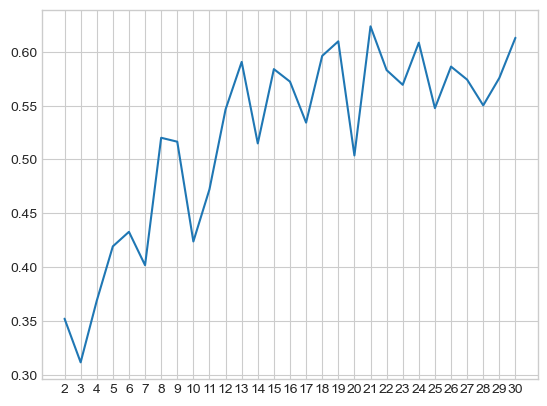

In [41]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [44]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=21)


In [45]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assume you have already fitted your LDA model as `lda_model`

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)

# Display the visualization in a Jupyter notebook
pyLDAvis.display(vis_data)



In [46]:
#5-star reviews

In [42]:
fivestar_df = data[(data['stars']==5)]

In [43]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in fivestar_df.iterrows():
    text = row["text"]
    documents.append(nlp(text))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [47]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(1, 0.05494458810987614), (3, 0.00353218680422322), (16, 0.01878993518930279), (19, 0.016018597839164234), (20, 0.06989770632105002), (28, 0.04934132524264905), (34, 0.0514355138322113), (40, 0.12023251162083173), (54, 0.01713261742736255), (56, 0.04076729924597337), (67, 0.03857864070713401), (77, 0.130270126740648), (86, 0.03174847671381625), (96, 0.04745144483820863), (97, 0.08202114121191524), (103, 0.08805756727368742), (108, 0.07772733211992908), (109, 0.13206342516625158), (110, 0.4114584134138681), (111, 0.07004617676677251), (112, 0.26669184126214196), (113, 0.1262338063037344), (114, 0.07024186943481707), (115, 0.28749162604858286), (116, 0.19824110244466317), (117, 0.23565904196199502), (118, 0.19511542718041577), (119, 0.11739988553191272), (120, 0.16352483868329776), (121, 0.12166022033319576), (122, 0.1104698596186198), (123, 0.10698551358154311), (124, 0.032628978985550644), (125, 0.06337364802556142), (126, 0.1898541871767258), (127, 0.1815872498873258), (128, 0.239648

In [48]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in fivestar_df.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [49]:
print(corpus_tfidf[2])

[(12, 0.04816368082232421), (38, 0.1813879732348593), (51, 0.061440819269581615), (52, 0.10463774205138954), (59, 0.09792147731316832), (60, 0.1615279850425732), (61, 0.36623859291104677), (62, 0.16946243865402727), (63, 0.24098869533867684), (64, 0.19746300600123326), (65, 0.16156781457732278), (66, 0.1696917921660433), (67, 0.13588031818063456), (68, 0.04397881357924546), (69, 0.11652906699732878), (70, 0.20619005591858777), (71, 0.3305952790465247), (72, 0.5120730426746994), (73, 0.17285787478912376), (74, 0.14108165952128526), (75, 0.17433475414970176), (76, 0.10884451780300783), (77, 0.07861823576774102), (78, 0.10776715220561912), (79, 0.20430038578702395)]


In [50]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

In [51]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.006*"visitor" + 0.005*"Subway" + 0.004*"Sonora" + 0.004*"respect" + 0.004*"Sushi"')
(1, '0.007*"," + 0.006*"good" + 0.006*"taco" + 0.005*"place" + 0.005*"food"')
(2, '0.006*"great" + 0.005*"amazing" + 0.005*"food" + 0.005*"," + 0.005*"good"')
(3, '0.007*"gyro" + 0.004*"sandwich" + 0.004*"," + 0.004*"good" + 0.003*"chicken"')
(4, '0.009*"," + 0.006*"great" + 0.006*"food" + 0.005*"place" + 0.005*"good"')
(5, '0.006*"Nate" + 0.005*"Shrimp" + 0.005*"Fresh" + 0.004*"booth" + 0.004*"Cheesecake"')
(6, '0.011*"Monica" + 0.004*"Mt" + 0.004*"aside" + 0.004*"rain" + 0.004*"cash"')
(7, '0.008*"cheesesteak" + 0.006*"consistently" + 0.006*"subs" + 0.005*"brisket" + 0.004*"amazingly"')
[(0, 0.012954025445080229), (1, 0.2613988672041951), (2, 0.22951304848273477), (3, 0.2530492624289451), (4, 0.22951304848273477), (5, 0.2613988672041951), (6, 0.19093657495491334), (7, 0.13058343970984795), (8, 0.10967627612857275), (9, 0.08655257725011112), (10, 0.10781611107148809), (11, 0.16021185998273862), 

In [52]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

In [53]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.47896776493053045


In [54]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/var/folders/cd/xth5td056xg6_t8pxj8ngh980000gn/T/ipykernel_31799/2035622219.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


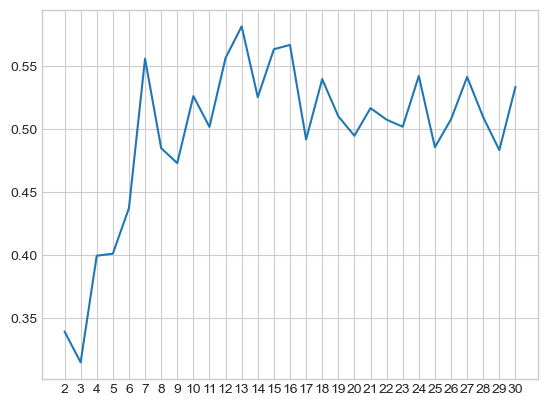

In [55]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [56]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=14)


In [57]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assume you have already fitted your LDA model as `lda_model`

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)

# Display the visualization in a Jupyter notebook
pyLDAvis.display(vis_data)



Example of Topics 2 and 4 in 1-star reviews

1. DINING ROOM IS OPEN! I am bumping them up a star because I think that they are the best sushi in Tucson. Tonight I tried 2 different types of Mackerel. The Spanish Mackerel was amazing because it had a Mint leaf in it which brought out a great mix of flavor and texture. The rest of the Nigiri was DELIGHTFUL as well. The Spicy Salmon Roll was a great choice. Consistently excellent quality sushi here. I highly recommend this establishment. Ikura (Salmon Roe) is one of my favorites. I wish that they would get some Uni (Sea Urchin). Total for this latest feast was $50 before tax.

2. Doesn't look like a high end sushi place when you walk in but do not let that fool you. I am a sushi fanatic this place is really good. I had the Kamikaze, Happy and Passion rolls. Outstanding combination of tastes and textures. The sauces were delicious. I also tried the tempura the shrimp was as good as I have ever had really nice light batter. Overall way above my expectations adding this place to the frequent stop list.

Example of topics 1,2 and 3 in 5-star reviews


1. This location is so accommodating and understand, especially during COVID. I was able to order carry out with no problems. The staff was personable and friendly. They do have people inside sitting but have lots of distance between tables. I was offered water while I waited and got my food quickly. It was delicious. I will definitely return to this location.

2. Great food, delicious and healthy. Staff is incredibly friendly and the patio seating by the fireplace is plentiful and comfortable. Planning our next menu combination already. Welcome to the neighborhood!


The LDA topic modeling for 1-star reviews highlights issues with the ambiance and expectations (e.g., places not appearing high-end but serving quality sushi), whereas 5-star reviews emphasize accommodation, service quality, and enjoyable food experiences. Good restaurant experiences are characterized by friendly staff, quality food, and a pleasant dining environment. In contrast, bad experiences may not necessarily relate to food quality but could involve mismatched expectations regarding the establishment's appearance and the dining experience's ambiance.

I have used chatgpt to understand the syntax of each function I have used. I have also used it to understand the importance of the parameters used in different methods.